In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('../dataset/processed/processed_data.csv')

#### Using intuition as a method of feature selection

In [3]:
# using intuition as a method of feature selection

customer_id = df['CustomerID']

# Feature selection
X = df.drop(columns= ['CustomerID', 'ChurnLabel', 'Age', 'NPS', 'account_age_days', 'subscription_age_days',\
                       'is_active', 'total_late_payments', 'payment_count', 'late_payment_rate', 'PageViews',\
                          'TimeSpent(minutes)', 'total_actions', 'add_to_cart_count', 'search_count',\
                              'click_count', 'unique_pages', 'Logins', 'frequency_score', 'avg_rating',\
                                  'emails_sent', 'emails_opened', 'emails_clicked', 'open_rate', 'click_rate', ])
y = df['ChurnLabel']

X

,total_purchase_value,total_frequency,product_diversity,Plan,subscription_duration_days,total_interactions,last_interaction_month,last_interaction_dayofweek,payment_risk_score,engagement_ratio,engagement_intensity,cart_conversion_rate,search_intensity,page_diversity,engagement_score,avg_comment_length,sentiment_score,is_negative,is_positive,click_through_rate,marketing_engagement,Gender_Female,Gender_Male,Segment_Segment A,Segment_Segment B,Segment_Segment C,nps_category_Detractor,nps_category_Passive,nps_category_Promoter,age_group,customer_segment
0,3994.72,38,7,2689.622546,871,4,7,6,400.00,0.300000,735,0.320000,0.480000,0.520000,76,96.0,0.2,1,0,0.888889,0.790123,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2844.35,4,3,2828.649426,290,19,12,1,25.00,0.089109,900,0.320000,0.280000,0.520000,36,108.0,0.4,1,0,0.900000,0.810000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
2,1866.52,14,3,2790.271692,319,3,1,1,16.00,48.500000,97,0.153846,0.538462,0.538462,19,72.0,0.8,0,1,0.888889,0.790123,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
3,1378.64,28,5,2905.696003,803,59,11,3,1560.25,1.192308,775,0.312500,0.333333,0.291667,120,78.0,0.2,1,0,0.909091,0.826446,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
4,2425.05,39,6,2714.759176,580,10,12,0,1.00,0.653846,3927,0.548387,0.129032,0.387097,48,99.0,0.6,0,0,0.875000,0.765625,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,1196.56,14,3,2790.271692,745,10,10,6,2.25,0.802817,3990,0.571429,0.142857,0.857143,660,37.0,0.4,1,0,0.800000,0.640000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0
12479,710.57,1,1,2859.778143,18,3,11,5,9.00,0.916667,4686,0.300000,0.300000,0.800000,100,102.0,0.6,0,0,0.875000,0.765625,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12480,5154.42,63,10,2723.138567,20,26,12,3,1722.25,0.010309,96,0.370370,0.407407,0.333333,9,134.0,1.0,0,1,0.833333,0.694444,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0
12481,6055.16,58,9,2816.218537,484,13,11,1,1122.25,0.031250,126,0.179487,0.384615,0.307692,2,113.0,1.0,0,1,0.500000,0.250000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0


In [4]:
# split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
X_train

,total_purchase_value,total_frequency,product_diversity,Plan,subscription_duration_days,total_interactions,last_interaction_month,last_interaction_dayofweek,payment_risk_score,engagement_ratio,engagement_intensity,cart_conversion_rate,search_intensity,page_diversity,engagement_score,avg_comment_length,sentiment_score,is_negative,is_positive,click_through_rate,marketing_engagement,Gender_Female,Gender_Male,Segment_Segment A,Segment_Segment B,Segment_Segment C,nps_category_Detractor,nps_category_Passive,nps_category_Promoter,age_group,customer_segment
5949,612.01,13,2,2850.765113,776,12,12,4,25.00,1.866667,392,0.333333,0.288889,0.311111,30,55.0,0.4,1,0,0.909091,0.826446,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
11838,3712.27,40,7,2905.696003,203,17,10,0,12.25,0.794118,891,0.277778,0.277778,0.611111,84,139.0,0.2,1,0,0.800000,0.640000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
12347,1691.90,14,3,2723.138567,103,5,8,1,600.25,0.842105,288,0.322581,0.258065,0.387097,30,39.0,0.4,1,0,0.909091,0.826446,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0
11424,1670.87,9,2,2664.971951,192,14,12,6,30.25,0.630000,6237,0.357143,0.071429,0.642857,26,103.0,0.2,1,0,0.857143,0.734694,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0
11607,2316.07,31,5,2718.572923,16,36,12,3,441.00,0.111111,890,0.256410,0.435897,0.333333,750,77.0,1.0,0,1,0.909091,0.826446,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,4268.85,57,9,2832.731828,228,48,8,1,900.00,0.270588,1932,0.000000,0.500000,0.500000,30,104.0,0.8,0,1,0.888889,0.790123,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0
4532,4083.91,42,10,2760.524359,351,41,11,0,841.00,0.326316,2914,0.423077,0.230769,0.461538,600,55.0,1.0,0,1,0.888889,0.790123,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
9265,1163.29,12,3,2718.572923,213,1,11,0,6.25,0.213115,780,0.204545,0.340909,0.272727,8,64.0,0.8,0,1,0.800000,0.640000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
9860,1594.91,15,3,2648.641754,36,6,5,6,16.00,0.412371,3840,0.366667,0.333333,0.333333,52,41.0,1.0,0,1,0.888889,0.790123,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0


In [6]:
# Train a Logistics Regression Model

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=1000,
        solver='lbfgs',
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

In [7]:
y_pred = pipeline.predict(X_test)

In [10]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

print("INTUITION-BASED FEATURE SELECTION MODEL EVALUATION\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


INTUITION-BASED FEATURE SELECTION MODEL EVALUATION

Accuracy: 0.9595514617541049
Precision: 0.9793729372937293
Recall: 0.9398258115597783
F1 Score: 0.9591919191919192

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1234
           1       0.98      0.94      0.96      1263

    accuracy                           0.96      2497
   macro avg       0.96      0.96      0.96      2497
weighted avg       0.96      0.96      0.96      2497



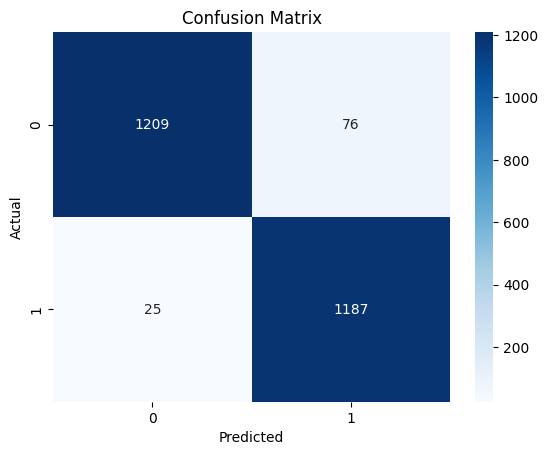

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()